In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [59]:
nids_original_dataframe = pd.read_csv('data/nids_data.csv')

#### **Data EDA**

In [60]:
print(nids_original_dataframe.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [61]:
nids_original_dataframe.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [62]:
nids_original_dataframe.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [63]:
print(nids_original_dataframe.isna().sum())

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [64]:
print(nids_original_dataframe['class'].unique())

['normal' 'anomaly']


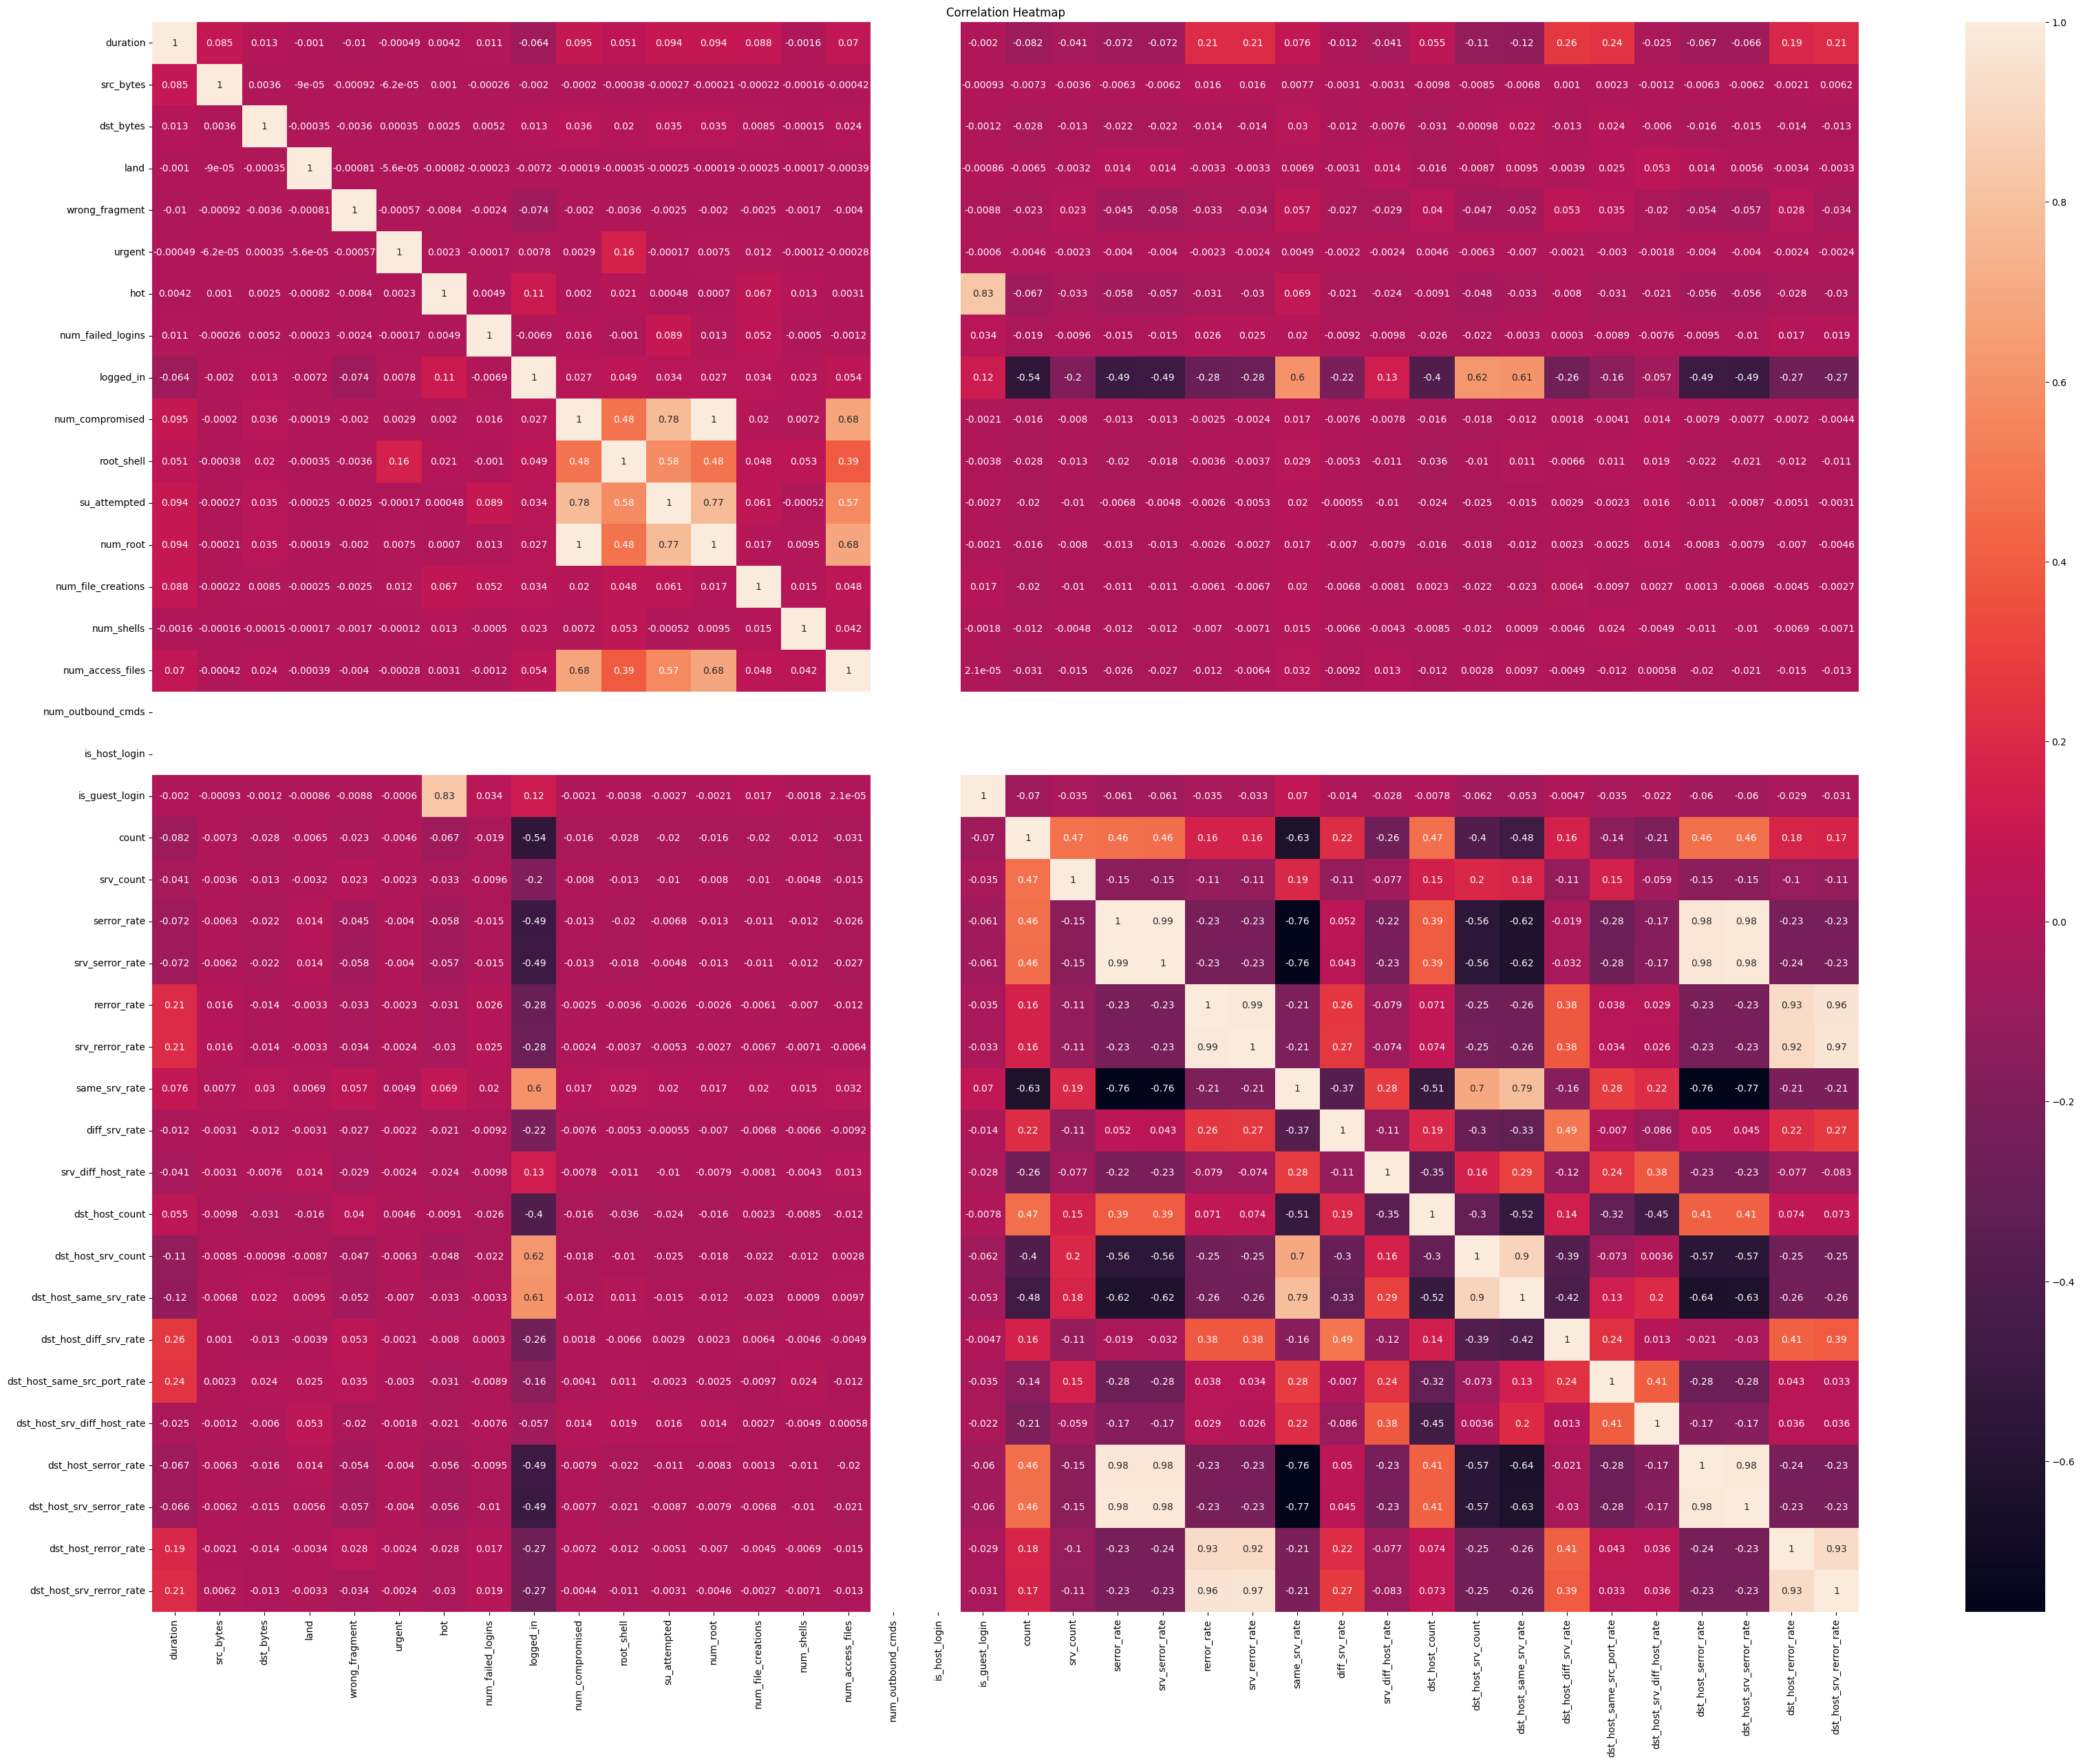

In [65]:
plt.figure(figsize=(40,30))
sns.heatmap(nids_original_dataframe.corr(numeric_only=True),annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [66]:
single_value_features = []

for col in nids_original_dataframe.columns:
    if len(nids_original_dataframe[col].unique()) == 1:
        single_value_features.append(col)

print("Features with only a single value:")
print(single_value_features)


Features with only a single value:
['num_outbound_cmds', 'is_host_login']


In [67]:

# Drop the single value features from the DataFrame
nids_original_dataframe = nids_original_dataframe.drop(single_value_features, axis=1)


In [68]:

import pandas as pd

# Assuming df is your DataFrame containing the dataset
# If df is not defined, define it using your actual dataset

# Check for duplicate rows
duplicate_rows = nids_original_dataframe.duplicated()

# Count the number of duplicate rows
num_duplicate_rows = duplicate_rows.sum()

if num_duplicate_rows > 0:
    print("The dataset has duplicate rows.")
    print("Number of duplicate rows:", num_duplicate_rows)
else:
    print("The dataset does not have any duplicate rows.")

The dataset does not have any duplicate rows.


In [69]:
categorical_columns = nids_original_dataframe.select_dtypes(include=['object']).columns.tolist()
numerical_columns = nids_original_dataframe.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical Columns:")
print(categorical_columns)

print("\nNumerical Columns:")
print(numerical_columns)


Categorical Columns:
['protocol_type', 'service', 'flag', 'class']

Numerical Columns:
['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']


In [70]:
for col in categorical_columns:
    print(nids_original_dataframe[col].unique())

['tcp' 'udp' 'icmp']
['ftp_data' 'other' 'private' 'http' 'remote_job' 'name' 'netbios_ns'
 'eco_i' 'mtp' 'telnet' 'finger' 'domain_u' 'supdup' 'uucp_path' 'Z39_50'
 'smtp' 'csnet_ns' 'uucp' 'netbios_dgm' 'urp_i' 'auth' 'domain' 'ftp'
 'bgp' 'ldap' 'ecr_i' 'gopher' 'vmnet' 'systat' 'http_443' 'efs' 'whois'
 'imap4' 'iso_tsap' 'echo' 'klogin' 'link' 'sunrpc' 'login' 'kshell'
 'sql_net' 'time' 'hostnames' 'exec' 'ntp_u' 'discard' 'nntp' 'courier'
 'ctf' 'ssh' 'daytime' 'shell' 'netstat' 'pop_3' 'nnsp' 'IRC' 'pop_2'
 'printer' 'tim_i' 'pm_dump' 'red_i' 'netbios_ssn' 'rje' 'X11' 'urh_i'
 'http_8001']
['SF' 'S0' 'REJ' 'RSTR' 'SH' 'RSTO' 'S1' 'RSTOS0' 'S3' 'S2' 'OTH']
['normal' 'anomaly']


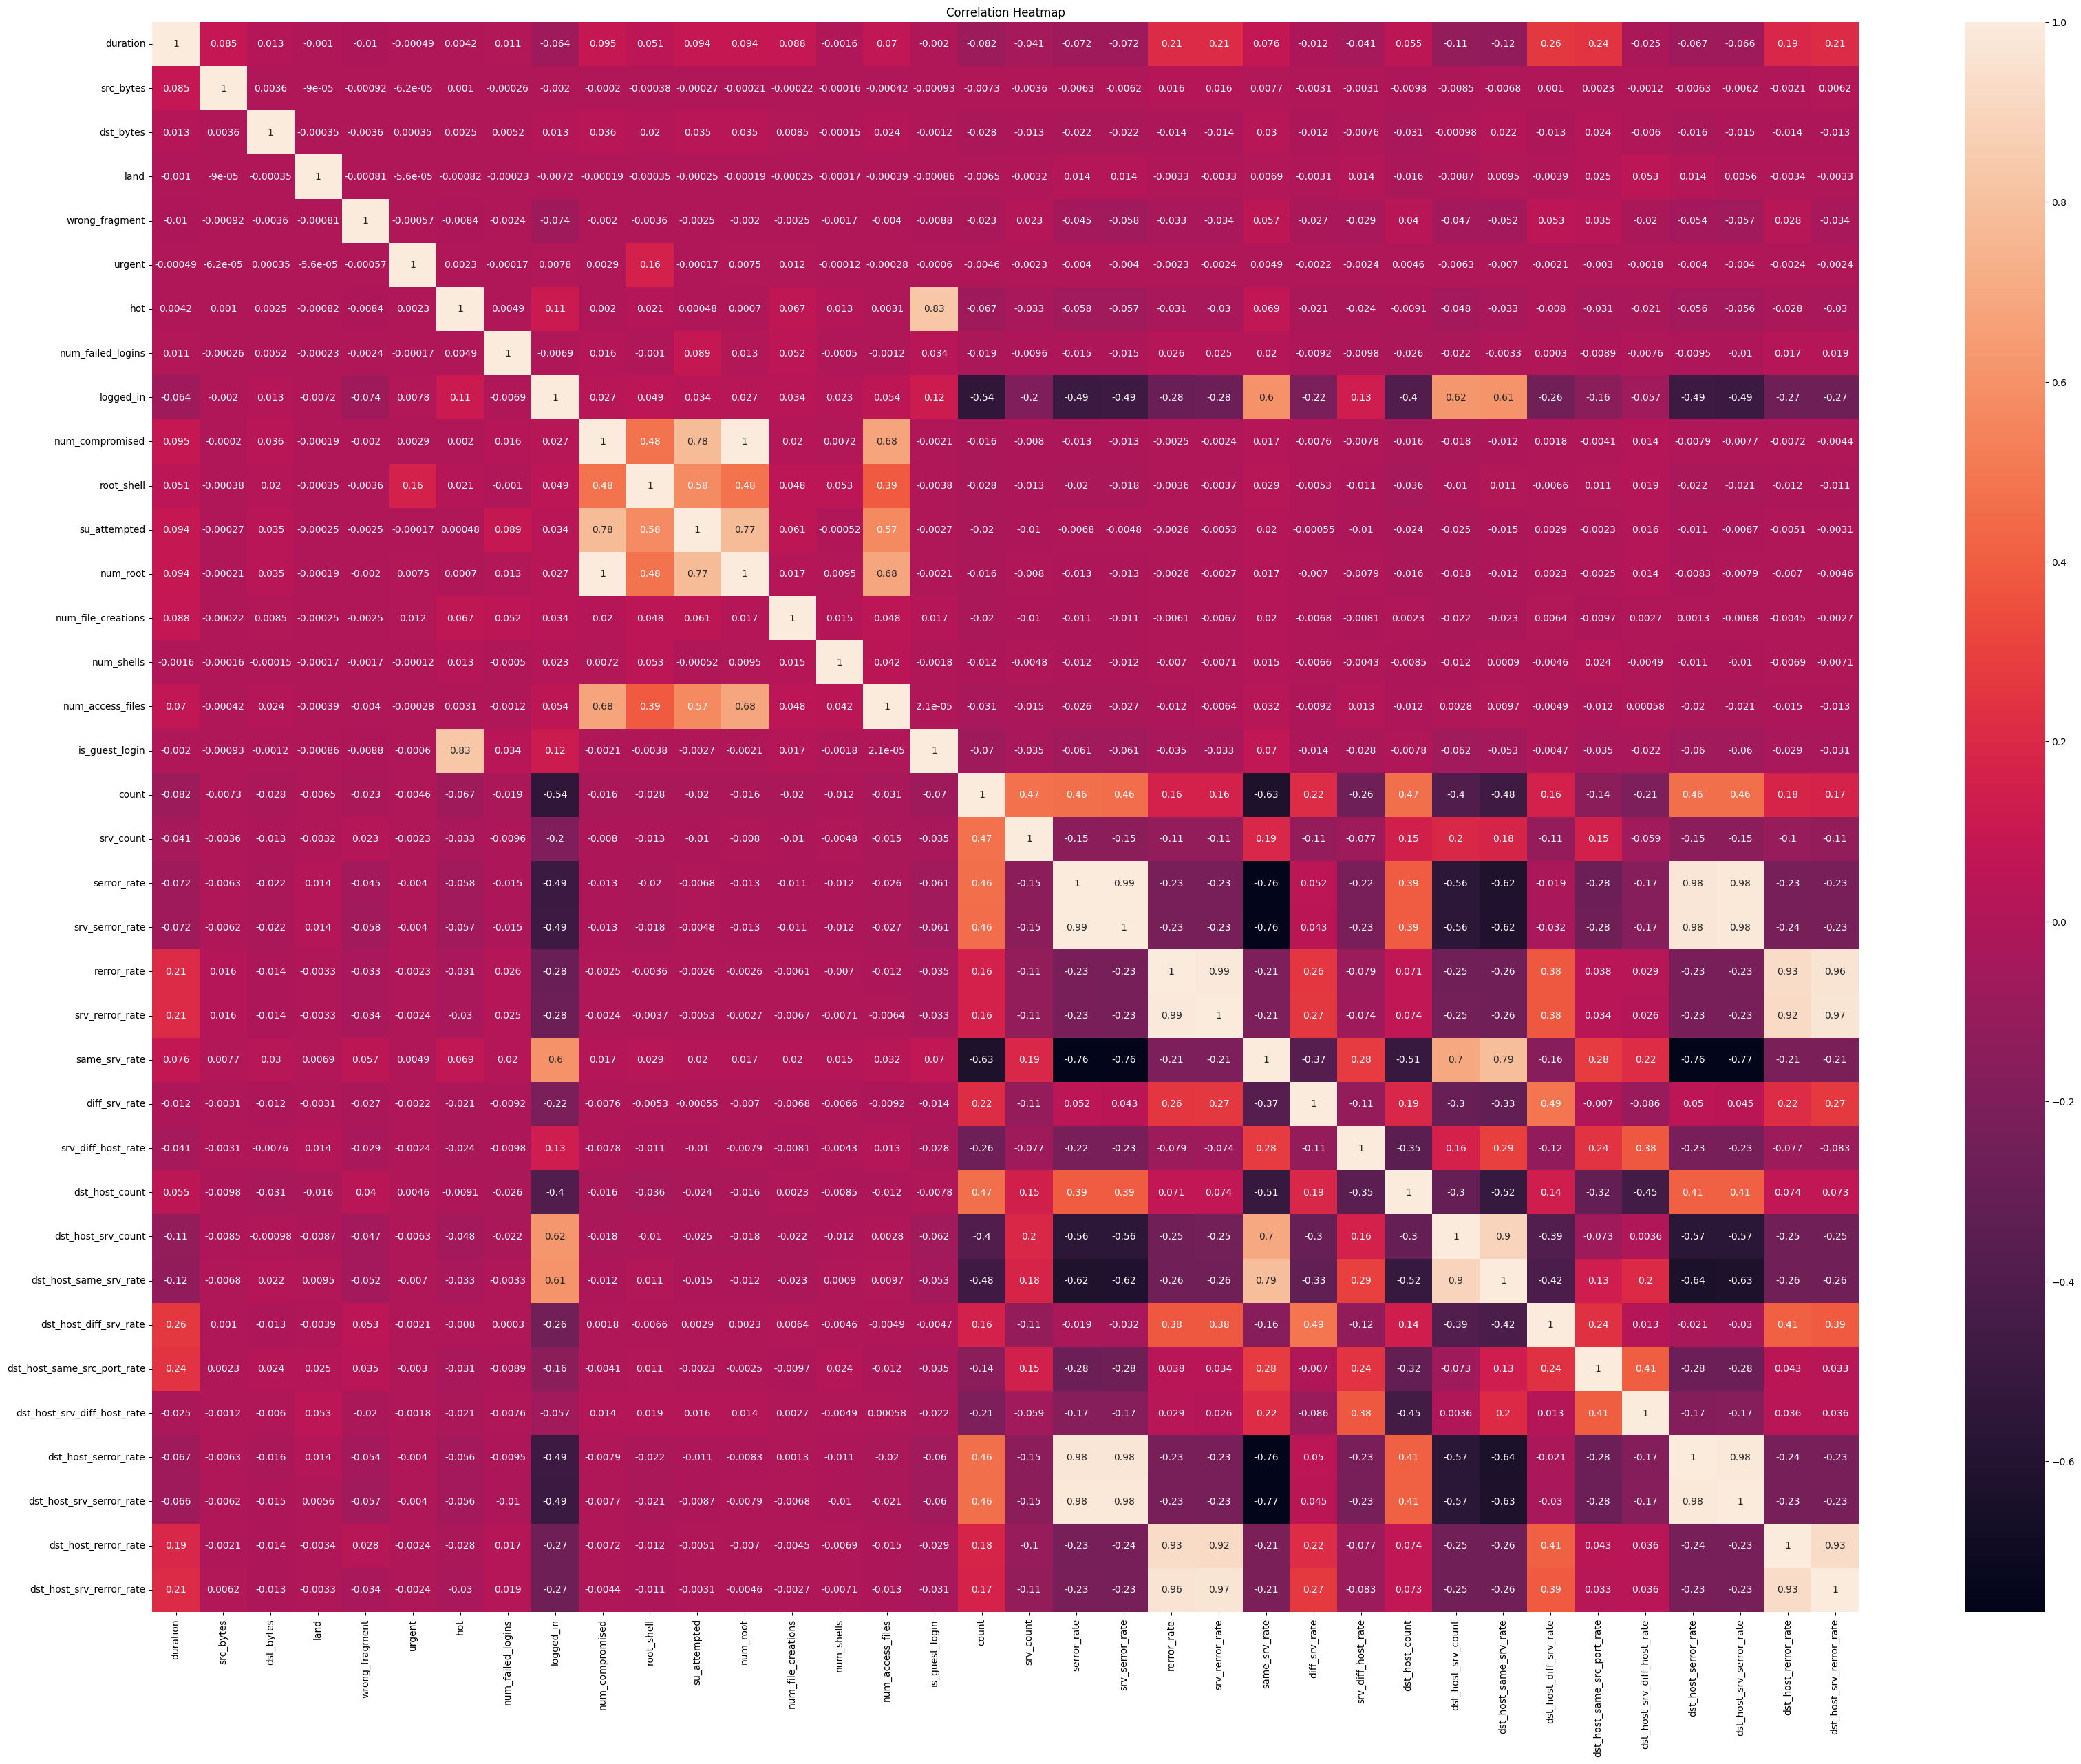

In [71]:
plt.figure(figsize=(40,30))
sns.heatmap(nids_original_dataframe.drop("class", axis=1).corr(numeric_only=True),annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [72]:
from sklearn.preprocessing import LabelEncoder
nids_original_dataframe_features = nids_original_dataframe.drop('class', axis=1)
label_encoder = LabelEncoder()

# Fit and transform the target variable
target_class_is = label_encoder.fit_transform(nids_original_dataframe['class'])
target_class_is = pd.Series(target_class_is)




In [73]:
corr_with_target = nids_original_dataframe_features.corrwith(target_class_is, numeric_only=True).apply(abs)
corr_with_target[corr_with_target>0.3]

logged_in                   0.688084
count                       0.578790
serror_rate                 0.649952
srv_serror_rate             0.647817
same_srv_rate               0.749237
dst_host_count              0.368828
dst_host_srv_count          0.719292
dst_host_same_srv_rate      0.692212
dst_host_serror_rate        0.651050
dst_host_srv_serror_rate    0.653759
dtype: float64

In [74]:
# Assuming you have the following variables:
# nids_original_dataframe_features: DataFrame containing numeric features
# target_class_is: Series representing the target class

# Compute the correlation with the target class and take the absolute value
corr_with_target = nids_original_dataframe_features.corrwith(target_class_is, numeric_only=True).apply(abs)

# Create a list of features with correlation greater than 0.3
significant_features = corr_with_target[corr_with_target > 0.3].index.tolist()



In [75]:
corr_with_target[corr_with_target<0.2]

duration                       0.050901
src_bytes                      0.005743
dst_bytes                      0.010949
land                           0.000605
wrong_fragment                 0.097625
urgent                         0.006743
hot                            0.012839
num_failed_logins              0.000028
num_compromised                0.018620
root_shell                     0.018579
su_attempted                   0.025851
num_root                       0.019753
num_file_creations             0.018322
num_shells                     0.013454
num_access_files               0.036999
is_guest_login                 0.038662
srv_count                      0.002370
diff_srv_rate                  0.193528
srv_diff_host_rate             0.120649
dst_host_same_src_port_rate    0.092974
dst_host_srv_diff_host_rate    0.062928
dtype: float64

In [76]:
# Drop 'land' and 'num_failed_logins' columns
nids_original_dataframe.drop(['land', 'num_failed_logins'], axis=1, inplace=True)
numerical_columns = nids_original_dataframe.select_dtypes(exclude=['object']).columns.tolist()


In [77]:
rows_to_remove_categorical = []
for col in categorical_columns:
    values_to_remove_categorical = nids_original_dataframe[col].value_counts()[nids_original_dataframe[col].value_counts() < 10].index
    rows_to_remove_categorical.extend(nids_original_dataframe[nids_original_dataframe[col].isin(values_to_remove_categorical)].index)

# Remove duplicate indices
rows_to_remove_categorical = list(set(rows_to_remove_categorical))

# Drop the rows containing values with count less than 15
nids_original_dataframe = nids_original_dataframe.drop(rows_to_remove_categorical)

# Reset index after dropping rows
nids_original_dataframe = nids_original_dataframe.reset_index(drop=True)

# Display the updated DataFrame
print(nids_original_dataframe.shape)


(25174, 38)


In [78]:
import pandas as pd

# Assuming nids_original_dataframe is your DataFrame containing the data
categorical_col = nids_original_dataframe.select_dtypes(exclude=['number']).columns.tolist()
for col in categorical_col:
    print("Column:", col)
    print(nids_original_dataframe[col].value_counts())

Column: protocol_type
protocol_type
tcp     20517
udp      3011
icmp     1646
Name: count, dtype: int64
Column: service
service
http          8002
private       4349
domain_u      1820
smtp          1448
ftp_data      1396
              ... 
rje             20
remote_job      17
pop_2           17
printer         12
shell           11
Name: count, Length: 61, dtype: int64
Column: flag
flag
SF        14961
S0         7008
REJ        2216
RSTR        497
RSTO        304
S1           88
SH           43
RSTOS0       21
S2           21
S3           15
Name: count, dtype: int64
Column: class
class
normal     13441
anomaly    11733
Name: count, dtype: int64


In [79]:
from scipy.stats import zscore

# Calculate Z-scores for numerical columns
z_scores = nids_original_dataframe[numerical_columns].apply(zscore)

# Define threshold for outliers (|Z| > 3)
threshold = 3

# Identify outlier rows
outlier_indices = z_scores[(z_scores.abs() > threshold).any(axis=1)].index

# Print the number of outlier rows
print("Number of outlier rows:", len(outlier_indices))

# Remove outlier rows from the DataFrame
nids_original_dataframe = nids_original_dataframe.drop(outlier_indices)

# Reset index after dropping rows
nids_original_dataframe = nids_original_dataframe.reset_index(drop=True)



Number of outlier rows: 4538


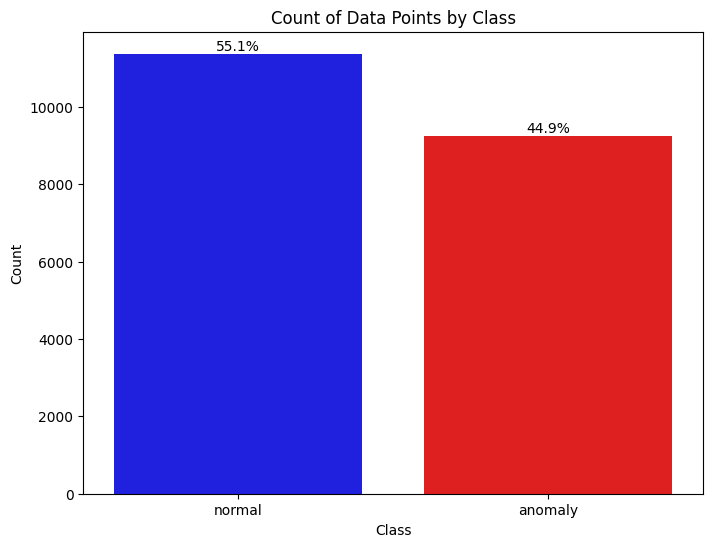

class
normal     11379
anomaly     9257
Name: count, dtype: int64


In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create countplot with color for each class
plt.figure(figsize=(8, 6))
sns.countplot(x='class', hue='class', data=nids_original_dataframe, palette=['blue', 'red'], legend=False)
plt.title('Count of Data Points by Class')
plt.xlabel('Class')
plt.ylabel('Count')

# Add percentage annotations
total_points = len(nids_original_dataframe)
for p in plt.gca().patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + 0.1,
             '{:.1f}%'.format((height / total_points) * 100),
             ha='center', va='bottom')

plt.show()
print(nids_original_dataframe['class'].value_counts())

In [81]:
from sklearn.preprocessing import LabelEncoder

# Assuming nids_original_dataframe is your DataFrame

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target variable
nids_original_dataframe['class'] = label_encoder.fit_transform(nids_original_dataframe['class'])




In [82]:
numeric_dataframe = nids_original_dataframe.select_dtypes(include=['number'])
print(numeric_dataframe.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20636 entries, 0 to 20635
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     20636 non-null  int64  
 1   src_bytes                    20636 non-null  int64  
 2   dst_bytes                    20636 non-null  int64  
 3   wrong_fragment               20636 non-null  int64  
 4   urgent                       20636 non-null  int64  
 5   hot                          20636 non-null  int64  
 6   logged_in                    20636 non-null  int64  
 7   num_compromised              20636 non-null  int64  
 8   root_shell                   20636 non-null  int64  
 9   su_attempted                 20636 non-null  int64  
 10  num_root                     20636 non-null  int64  
 11  num_file_creations           20636 non-null  int64  
 12  num_shells                   20636 non-null  int64  
 13  num_access_files

In [83]:
significant_features += ['class']
print(significant_features)
# sns.pairplot(nids_original_dataframe[siginificant_features], hue='class')

['logged_in', 'count', 'serror_rate', 'srv_serror_rate', 'same_srv_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'class']


In [84]:
# import matplotlib.pyplot as plt
# import matplotlib.pylab as pylab
# import seaborn as sns


# params = {
#     'legend.fontsize': 'x-large',
#     'figure.figsize': (15, 5),
#     'axes.labelsize': 'x-large',
#     'axes.titlesize':'x-large',
#     'xtick.labelsize':'x-large',
#     'ytick.labelsize':'x-large'
# }
# pylab.rcParams.update(params)

# plt.figure(figsize=(32, 62))

# num_cols = 3
# num_rows = int(nids_original_dataframe[siginificant_features].shape[1] / num_cols) + 1

# for index, col in enumerate(nids_original_dataframe[siginificant_features].drop('class', axis=1).columns):
#     plt.subplot(num_rows, num_cols, index + 1)
#     sns.histplot(nids_original_dataframe[siginificant_features], x=col, hue='class', kde=True, bins=50)

#     # Increase x-axis and y-axis title font size
#     plt.xlabel(col, fontsize=20)
#     plt.ylabel('Count', fontsize=20)

# plt.tight_layout()
# plt.show()

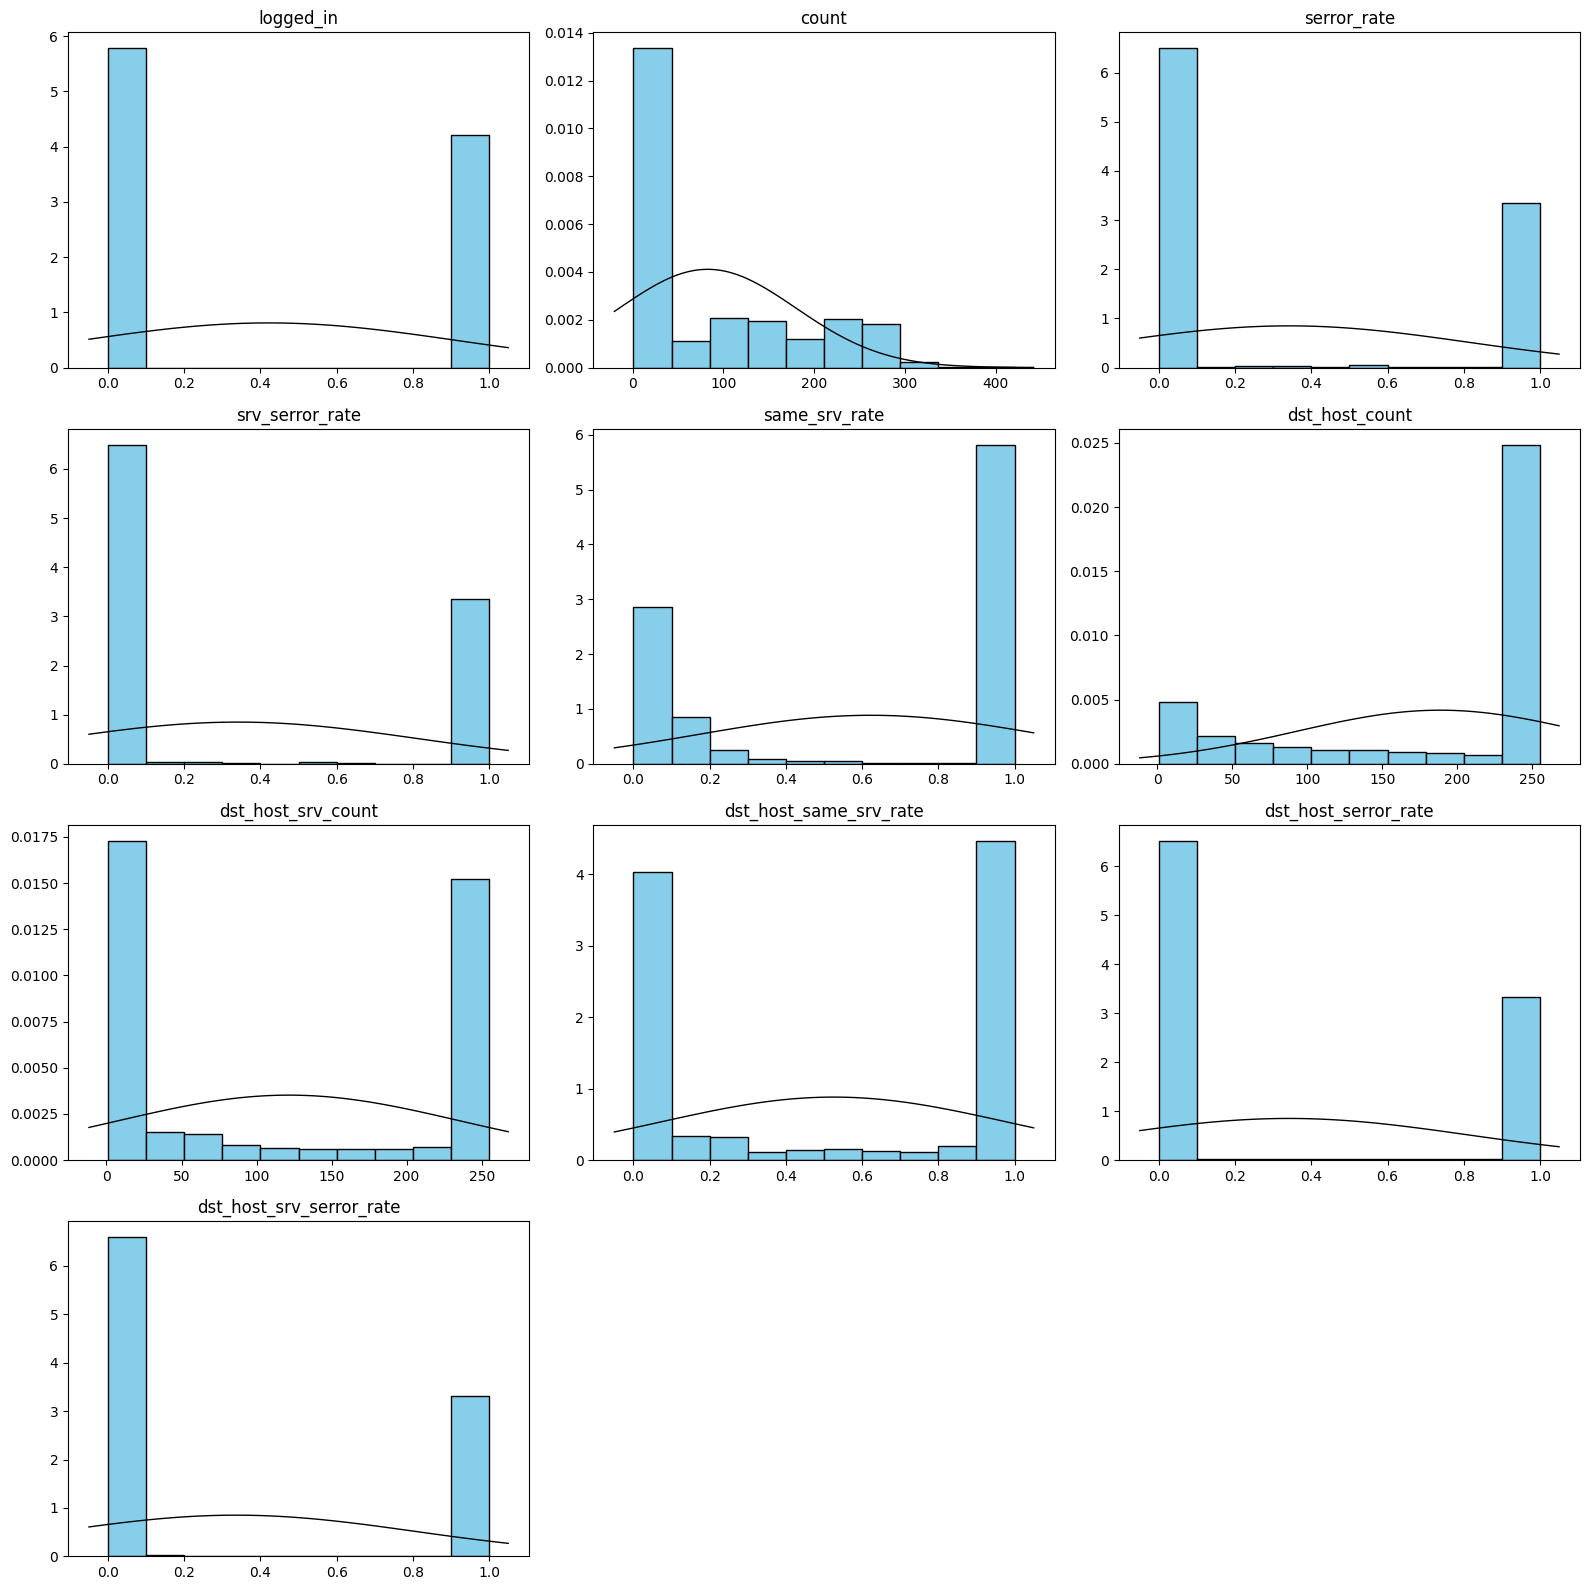

In [87]:
from scipy.stats import norm


# Remove 'class' from the list
try:
    significant_features.remove('class')
except:
    print("")

significant_feat_df = nids_original_dataframe[significant_features]

num_features = len(significant_feat_df.columns)
num_rows = int(np.ceil(num_features**0.5))
num_cols = int(np.ceil(num_features / num_rows))

# Plot histogram subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 16))

for i, col in enumerate(significant_feat_df.columns):
    ax = axes[i // num_cols, i % num_cols]
    ax.hist(significant_feat_df[col], bins=10, color='skyblue', edgecolor='black', density=True)
    ax.set_title(col)

    # Fit a normal distribution to the data
    mu, std = norm.fit(significant_feat_df[col])
    
    # Plot the normal distribution curve
    xmin, xmax = ax.get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    ax.plot(x, p, 'k', linewidth=1)

# Hide any empty subplots
for j in range(num_features, num_rows * num_cols):
    axes.flatten()[j].axis('off')

plt.tight_layout()
plt.show()